In [0]:
!pip install -q kaggle

# !pip uninstall -y kaggle
# !pip install --upgrade pip
# !pip install kaggle==1.5.6
# !kaggle -v

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp "/content/drive/My Drive/Colab Notebooks/KGP Talkie DL/kaggle.json" ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
import kaggle

In [6]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

cell-images-for-detecting-malaria.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip "/content/cell-images-for-detecting-malaria.zip"

Archive:  /content/cell-images-for-detecting-malaria.zip
replace cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
# !cp -r "/content/cell_images" "/content/drive/My Drive/Colab Notebooks/Data Folder/"

In [9]:
!pip install tensorflow-gpu

In [10]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn import datasets,metrics
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import VarianceThreshold


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPool2D,ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.2.0


In [0]:
img_width = 64  # Can increase if you better computational resources   
img_height = 64 # Can increase if you better computational resources 

In [0]:
datagen = ImageDataGenerator(rescale = 1/255.0 , validation_split=0.2)

In [13]:
train_data_generator = datagen.flow_from_directory(directory="/content/cell_images",
                                                   target_size = (img_width,img_height),
                                                   class_mode = "binary",
                                                   batch_size = 16,
                                                   subset = "training")

Found 44095 images belonging to 3 classes.


In [14]:
validation_data_genertor = datagen.flow_from_directory(directory="/content/cell_images",
                                                       target_size = (img_width,img_height),
                                                       class_mode = "binary",
                                                       batch_size = 16,
                                                       subset = "validation")

Found 11021 images belonging to 3 classes.


In [15]:
train_data_generator.labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

# CNN Model Building

In [16]:
model = Sequential()

model.add(Conv2D(16,(3,3),input_shape=(img_width,img_height,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),input_shape=(img_width,img_height,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [0]:
model.compile(optimizer = "adam" ,  loss = "binary_crossentropy" , metrics = ['accuracy'] )

In [18]:
epochs = 5 
history= model.fit_generator(generator=train_data_generator,
                             steps_per_epoch = len(train_data_generator),
                             epochs = epochs,
                             validation_data = validation_data_genertor ,
                             validation_steps = len(validation_data_genertor))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
2756/2756 [==============================] - 67s 24ms/step - loss: -6563687424.0000 - accuracy: 0.2499 - val_loss: -27621629952.0000 - val_accuracy: 0.2500
Epoch 2/5
2756/2756 [==============================] - 67s 24ms/step - loss: -122941808640.0000 - accuracy: 0.2500 - val_loss: -257891647488.0000 - val_accuracy: 0.2497
Epoch 3/5
2756/2756 [==============================] - 67s 24ms/step - loss: -568836816896.0000 - accuracy: 0.2500 - val_loss: -920032509952.0000 - val_accuracy: 0.2501
Epoch 4/5
2756/2756 [==============================] - 68s 25ms/step - loss: -1620058046464.0000 - accuracy: 0.2500 - val_loss: -2282426204160.0000 - val_accuracy: 0.2500
Epoch 5/5
2756/2756 [==============================] - 67s 24ms/step - loss: -3531403952128.0000 - accuracy: 0.2500 - val_loss: -4644192387072.0000 - val_accuracy: 0.2494


In [19]:
history.history

{'accuracy': [0.2499149590730667,
  0.25000566244125366,
  0.25000566244125366,
  0.25000566244125366,
  0.25000566244125366],
 'loss': [-6563687424.0,
  -122941808640.0,
  -568836816896.0,
  -1620058046464.0,
  -3531403952128.0],
 'val_accuracy': [0.24997732043266296,
  0.24970510601997375,
  0.2500680387020111,
  0.24997732043266296,
  0.24943290650844574],
 'val_loss': [-27621629952.0,
  -257891647488.0,
  -920032509952.0,
  -2282426204160.0,
  -4644192387072.0]}

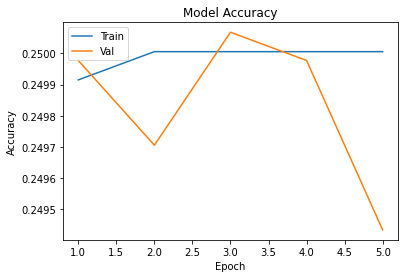

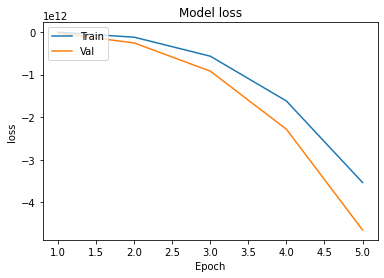

In [20]:
def plot_learningCurve(history,epochs):
  # Plot the training and validation accuracy valeus
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(["Train","Val"],loc = "upper left")
  plt.show()
  # Plot the training and validation accuracy valeus
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model loss")
  plt.xlabel("Epoch")
  plt.ylabel("loss")
  plt.legend(["Train","Val"],loc = "upper left")
  plt.show()

plot_learningCurve(history,epochs=epochs)